In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astroclip.utils import format_axes

In [90]:
!mkdir out

mkdir: out: File exists


## Load the WandB logs

In [169]:
val_loss_logs = pd.read_csv('wandb_logs/val_loss.csv')
train_loss_logs = pd.read_csv('wandb_logs/train_loss.csv')
train_batch_size = pd.read_csv('wandb_logs/train_batch_size.csv')
ii_logs = pd.read_csv('wandb_logs/val_ii_score.csv')
ss_logs = pd.read_csv('wandb_logs/val_ss_score.csv')
is_logs = pd.read_csv('wandb_logs/val_is_score.csv')
si_logs = pd.read_csv('wandb_logs/val_si_score.csv')

# colours for the plots
colours = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

cols = list(val_loss_logs.columns)
cols

['Step',
 '8-dim',
 '16-dim',
 '32-dim',
 '64-dim',
 '128-dim',
 '256-dim',
 '512-dim']

## Plot the validation loss for each model

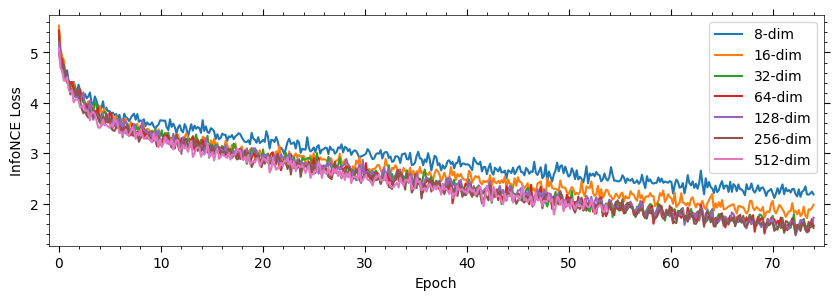

In [217]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
train_x = (train_loss_logs.index / train_loss_logs.index[-1]) * 74

for col, colour in zip(cols[1:], colours):
    plt.plot(train_x, train_loss_logs[col], label=col, color=colour)
    
plt.legend()
plt.xlabel('Epoch')

plt.ylabel('InfoNCE Loss')
plt.xlim(-1, 75)
format_axes(ax)

plt.savefig('out/train_loss.png', bbox_inches='tight')

8-dim: 4.06 at epoch 24
16-dim: 3.92 at epoch 39
32-dim: 3.92 at epoch 16
64-dim: 3.86 at epoch 27
128-dim: 3.85 at epoch 40
256-dim: 3.81 at epoch 26
512-dim: 3.81 at epoch 26


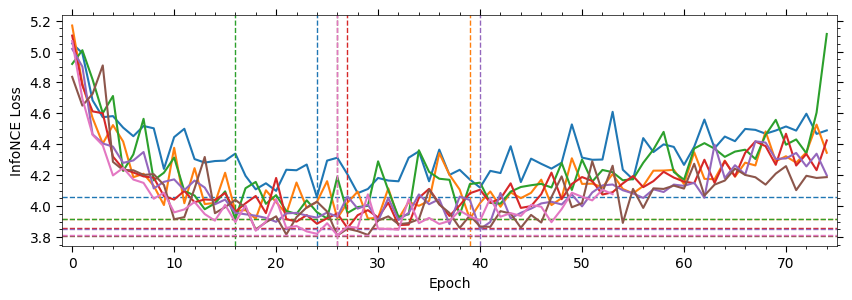

In [220]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
val_x = val_loss_logs.index

for col, colour in zip(cols[1:], colours):
    plt.plot(val_x, val_loss_logs[col], label=col, color=colour)
    idx_of_min_val_loss = val_loss_logs.index[np.argmin(val_loss_logs[col])]
    plt.axvline(x=idx_of_min_val_loss, color=colour, linestyle='--', lw=1)
    plt.axhline(y=min(val_loss_logs[col]), color=colour, linestyle='--', lw=1)
    
    print(f'{col}: {min(val_loss_logs[col]):.2f} at epoch {idx_of_min_val_loss}')
    
plt.xlabel('Epoch')

plt.ylabel('InfoNCE Loss')
plt.xlim(-1, 75)
format_axes(ax)

plt.savefig('out/val_loss.png', bbox_inches='tight')

## Plot the R2 values for the lowest loss model

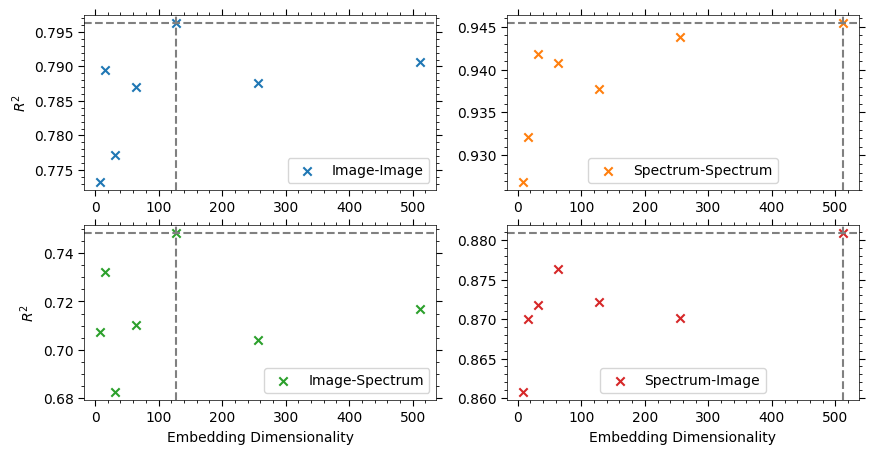

In [168]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))
x = [8, 16, 32, 64, 128, 256, 512]

for idx, (ax, logs, label) in enumerate(zip(
        axes.flatten(), 
        [ii_logs, ss_logs, is_logs, si_logs], 
        ['Image-Image', 'Spectrum-Spectrum', 'Image-Spectrum', 'Spectrum-Image']
)):
    best_model_r2 = []
    
    for col in x:
        col = f'{col}-dim'
        
        step_of_min_loss = val_loss_logs['Step'][np.argmin(val_loss_logs[col])]
        r2_at_min_loss = logs.loc[logs['Step'] == step_of_min_loss].iloc[0][col]
        best_model_r2.append(r2_at_min_loss)
        
    ax.scatter(x, best_model_r2, label=label, marker='x', color=colours[idx])
    ax.axvline(x=x[np.argmax(best_model_r2)], color='grey', linestyle='--')
    ax.axhline(y=max(best_model_r2), color='grey', linestyle='--')
    format_axes(ax)
    
    ax.legend()
    
axes[0, 0].set_ylabel(r'$R^{2}$')
axes[1, 0].set_ylabel(r'$R^{2}$')
axes[1, 0].set_xlabel(r'Embedding Dimensionality')
axes[1, 1].set_xlabel(r'Embedding Dimensionality')

axes[0, 1].legend(loc='lower center')
    
plt.savefig('out/r2_vs_embedding_dim.png', bbox_inches='tight')

## Plot the training batch_size

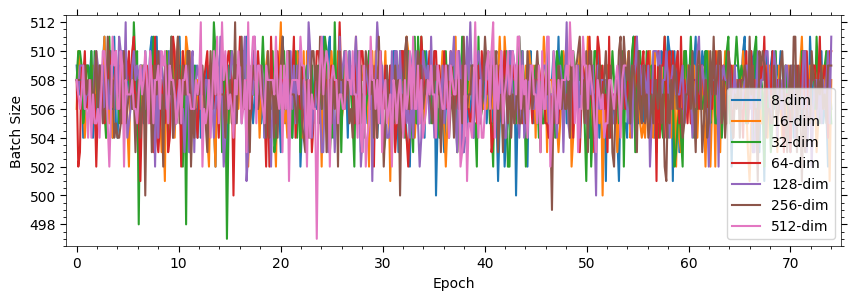

In [214]:
train_x = (train_batch_size.index / train_batch_size.index[-1]) * 74

fig, ax = plt.subplots(1, 1, figsize=(10, 3))

for col, colour in zip(cols[1:], colours):
    plt.plot(train_x, train_batch_size[col], label=col, color=colour)
    
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Batch Size')
plt.xlim(-1, 75)
plt.ylim(496.5, 512.5)
format_axes(ax)

plt.savefig('out/train_batch_size.png', bbox_inches='tight')